## Step 1: Import data and relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
training_data_loc = 'data/loan_data_training.csv'
training_data = pd.read_csv(training_data_loc)

test_data_loc = 'data/loan_data_test.csv'
test_data = pd.read_csv(test_data_loc)

print('%i records in training data set' % len(training_data))
print('%i records in test data set' % len(test_data))

614 records in training data set
367 records in test data set


## Step 2: Clean data in training and test sets

In [3]:
train_data_cols_with_nan_values = training_data.columns[training_data.isna().any()].tolist()
print('%i columns in training data set have NaN values' % (len(train_data_cols_with_nan_values)))
print(train_data_cols_with_nan_values)

test_data_cols_with_nan_values = test_data.columns[test_data.isna().any()].tolist()
print('%i columns in test data set have NaN values' % (len(test_data_cols_with_nan_values)))
print(test_data_cols_with_nan_values)

7 columns in training data set have NaN values
['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
6 columns in test data set have NaN values
['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [4]:
training_data['Gender'] = training_data['Gender'].fillna(training_data.mode()['Gender'][0])
training_data['Married'] = training_data['Married'].fillna(training_data.mode()['Married'][0])
training_data['Dependents'] = training_data['Dependents'].fillna(training_data.mode()['Dependents'][0])
training_data['Self_Employed'] = training_data['Self_Employed'].fillna(training_data.mode()['Self_Employed'][0])
training_data['Loan_Amount_Term'] = training_data['Loan_Amount_Term'].fillna(training_data.mode()['Loan_Amount_Term'][0])
training_data['Credit_History'] = training_data['Credit_History'].fillna(training_data.mode()['Credit_History'][0])
training_data['LoanAmount'] = training_data['LoanAmount'].fillna(training_data['LoanAmount'].median())

test_data['Gender'] = test_data['Gender'].fillna(test_data.mode()['Gender'][0])
test_data['Dependents'] = test_data['Dependents'].fillna(test_data.mode()['Dependents'][0])
test_data['Self_Employed'] = test_data['Self_Employed'].fillna(test_data.mode()['Self_Employed'][0])
test_data['Loan_Amount_Term'] = test_data['Loan_Amount_Term'].fillna(test_data.mode()['Loan_Amount_Term'][0])
test_data['Credit_History'] = test_data['Credit_History'].fillna(test_data.mode()['Credit_History'][0])
test_data['LoanAmount'] = test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())

In [5]:
train_data_cols_with_nan_values = training_data.columns[training_data.isna().any()].tolist()
print('%i columns in training data set have NaN values' % (len(train_data_cols_with_nan_values)))
print(train_data_cols_with_nan_values)

test_data_cols_with_nan_values = test_data.columns[test_data.isna().any()].tolist()
print('%i columns in test data set have NaN values' % (len(test_data_cols_with_nan_values)))
print(test_data_cols_with_nan_values)

0 columns in training data set have NaN values
[]
0 columns in test data set have NaN values
[]


## Step 3: Encode data

In [6]:
from sklearn.preprocessing import LabelEncoder

list_of_columns_to_encode = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Property_Area',
    'Credit_History',
    'Loan_Status'
]

le = LabelEncoder()

for column in list_of_columns_to_encode:
    training_data[column] = le.fit_transform(training_data[column])

list_of_columns_to_encode.remove('Loan_Status')

for column in list_of_columns_to_encode:
    test_data[column] = le.fit_transform(test_data[column])

## Step 4: Build models - version 1

Accuracy of SVC: 0.6891 (+/- 0.0796)
Accuracy of DecisionTreeClassifier: 0.6674 (+/- 0.0389)
Accuracy of KNeighborsClassifier: 0.6239 (+/- 0.0819)
Accuracy of RandomForestClassifier: 0.7500 (+/- 0.0689)
Accuracy of GradientBoostingClassifier: 0.7826 (+/- 0.0496)
Accuracy of GaussianNB: 0.7935 (+/- 0.0392)
Accuracy of LogisticRegression: 0.8065 (+/- 0.0528)


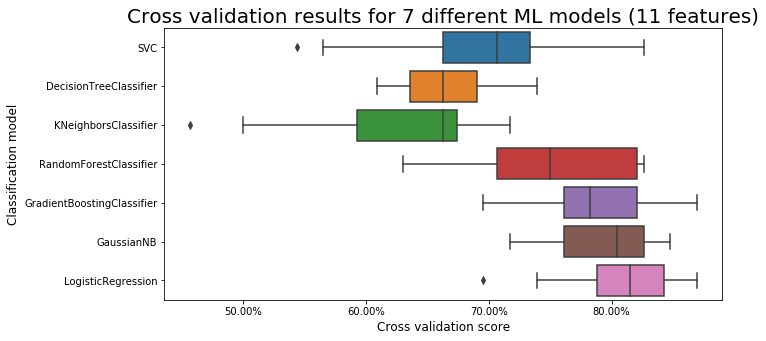

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

features_for_analysis = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Property_Area',
    'Credit_History',
]

features = training_data[features_for_analysis]

loan_status = training_data['Loan_Status']

train_data, validation_data, train_labels, validation_labels = train_test_split(features, loan_status, test_size=0.25, random_state=25)

results = []

names = []

models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    names.append(classifier_name)
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.4f (+/- %0.4f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

fig = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=results, orient='h')
ax.set_yticklabels(labels=names)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(val) for val in x_values])
plt.title('Cross validation results for 7 different ML models (11 features)', fontsize=20)
plt.xlabel('Cross validation score', fontsize=12)
plt.ylabel('Classification model', fontsize=12)
plt.show()

## Step 5: Generate predictions for test data with LogisticRegression - version 1

In [8]:
from sklearn.metrics import accuracy_score

lr_classifier = LogisticRegression()

lr_classifier.fit(train_data, train_labels)

lr_classifier_predictions = lr_classifier.predict(validation_data)

lr_classifier_accuracy_score = accuracy_score(validation_labels, lr_classifier_predictions)

print('The accuracy score of a basic LogisticRegression classifier: %f' % (lr_classifier_accuracy_score))

The accuracy score of a basic LogisticRegression classifier: 0.805195


In [9]:
submission_df = pd.read_csv('data/sample_submission.csv')

test_data = test_data.drop('Loan_ID', axis=1)

test_predictions_for_submission = lr_classifier.predict(test_data)

submission_df['Loan_Status'] = test_predictions_for_submission

submission_df['Loan_Status'].replace(0, 'N',inplace=True) 

submission_df['Loan_Status'].replace(1, 'Y',inplace=True)

submission_df.to_csv('submissions/challenge_submission.csv', index=False)

## Step 6: Feature engineering

In [10]:
training_data['Total_Income'] = training_data['ApplicantIncome'] + training_data['CoapplicantIncome']
training_data['Dual_Income_Household'] = np.where((training_data['ApplicantIncome'] > 0) & (training_data['CoapplicantIncome'] > 0), 1, 0)
training_data['Monthly_Payments'] = training_data['LoanAmount'] / training_data['Loan_Amount_Term'] * 30
training_data['Debt_Percentage'] = training_data['Monthly_Payments'] / training_data['Total_Income'] * 100

test_data['Total_Income'] = test_data['ApplicantIncome'] + test_data['CoapplicantIncome']
test_data['Dual_Income_Household'] = np.where((test_data['ApplicantIncome'] > 0) & (test_data['CoapplicantIncome'] > 0), 1, 0)
test_data['Monthly_Payments'] = test_data['LoanAmount'] / test_data['Loan_Amount_Term'] * 30
test_data['Debt_Percentage'] = test_data['Monthly_Payments'] / test_data['Total_Income'] * 100

## Step 7: Build models - version 2

Accuracy of SVC: 0.6891 (+/- 0.0796)
Accuracy of DecisionTreeClassifier: 0.6717 (+/- 0.0670)
Accuracy of KNeighborsClassifier: 0.6239 (+/- 0.0728)
Accuracy of RandomForestClassifier: 0.7543 (+/- 0.0351)
Accuracy of GradientBoostingClassifier: 0.7848 (+/- 0.0490)
Accuracy of GaussianNB: 0.7978 (+/- 0.0477)
Accuracy of LogisticRegression: 0.8043 (+/- 0.0466)


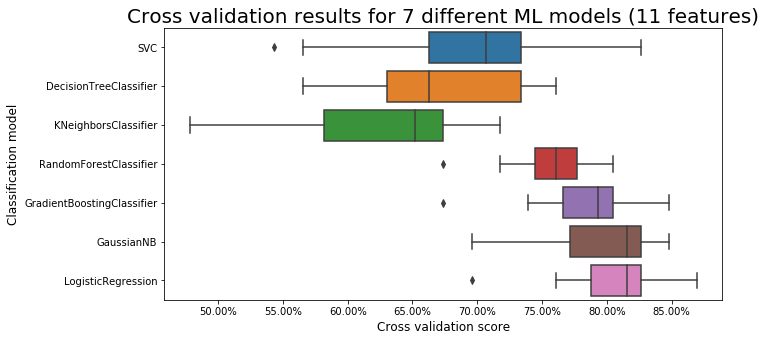

In [11]:
features_for_analysis = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'Total_Income',
    'Dual_Income_Household',
    'Monthly_Payments',
    'Debt_Percentage',
    'LoanAmount',
    'Loan_Amount_Term',
    'Property_Area',
    'Credit_History',
]

features = training_data[features_for_analysis]

loan_status = training_data['Loan_Status']

train_data, validation_data, train_labels, validation_labels = train_test_split(features, loan_status, test_size=0.25, random_state=25)

results = []

names = []

models = [
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

for model in models:
    result = {}
    classifier_name = model.__class__.__name__
    names.append(classifier_name)
    kfold = KFold(n_splits=10, random_state=25)
    cross_val_results = cross_val_score(model, train_data, train_labels, cv=kfold, scoring='accuracy')
    result['classifier_name'] = classifier_name
    result['classifier_results'] = cross_val_results
    results_message = "Accuracy of %s: %0.4f (+/- %0.4f)" % (classifier_name, cross_val_results.mean(), cross_val_results.std())
    print(results_message)
    results.append(cross_val_results)

fig = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=results, orient='h')
ax.set_yticklabels(labels=names)
x_values = ax.get_xticks()
ax.set_xticklabels(['{:,.2%}'.format(val) for val in x_values])
plt.title('Cross validation results for 7 different ML models (11 features)', fontsize=20)
plt.xlabel('Cross validation score', fontsize=12)
plt.ylabel('Classification model', fontsize=12)
plt.show()

In [12]:
## Step 8: Generate predictions for test data with LogisticRegression - version 2

In [13]:
from sklearn.metrics import accuracy_score

lr_classifier = LogisticRegression()

lr_classifier.fit(train_data, train_labels)

lr_classifier_predictions = lr_classifier.predict(validation_data)

lr_classifier_accuracy_score = accuracy_score(validation_labels, lr_classifier_predictions)

print('The accuracy score of a basic LogisticRegression classifier: %f' % (lr_classifier_accuracy_score))

The accuracy score of a basic LogisticRegression classifier: 0.805195


In [14]:
submission_df = pd.read_csv('data/sample_submission.csv')

test_data_copy = test_data[features_for_analysis]

test_predictions_for_submission = lr_classifier.predict(test_data_copy)

submission_df['Loan_Status'] = test_predictions_for_submission

submission_df['Loan_Status'].replace(0, 'N',inplace=True) 

submission_df['Loan_Status'].replace(1, 'Y',inplace=True)

submission_df.to_csv('submissions/challenge_submission.csv', index=False)